<a href="https://colab.research.google.com/github/khushishah03/Mini-project-Smartknower/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import tensorflow as tf

In [2]:
#importing the dataset
from tensorflow.keras.datasets import mnist
(x_train ,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#shapes of imported dataset
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


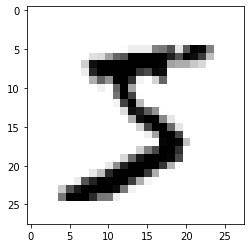

In [4]:
from matplotlib import pyplot as plt 
%matplotlib inline

plt.imshow(x_train[0], cmap='binary')
plt.show()

In [5]:
y_train[0]

5

In [6]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [7]:
#one_hot_encoding
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [8]:
#validating shapes
print('y_train_encoded shape:',y_train_encoded.shape)
print('y_test_encoded shape:' ,y_test_encoded.shape)

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


In [9]:
#display encoded labels
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
#preprocessing the examples

import numpy as np

x_train_reshaped=np.reshape(x_train,(60000, 784))
x_test_reshaped=np.reshape(x_test,(10000, 784))

print('x_train_reshaped shape:', x_train_reshaped.shape)
print('x_test_reshaped shape:',x_test_reshaped.shape)

x_train_reshaped shape: (60000, 784)
x_test_reshaped shape: (10000, 784)


In [11]:
#display pixel values
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [12]:
#data normalization

x_mean=np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)

epsilon= 1e-10

x_train_norm= (x_train_reshaped-x_mean)/(x_std+epsilon)
x_test_norm=(x_test_reshaped)/(x_std+epsilon)

In [13]:
#dispay normalized pixel values
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

In [14]:
#creating the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
      Dense(128, activation ='relu',input_shape=(784,)),
      Dense(128, activation ='relu'), 
      Dense(10, activation ='softmax')             
])

In [16]:
#compiling the model
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [19]:
#training the model
model.fit(x_train_norm, y_train_encoded, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1141 - accuracy: 0.9669
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0963 - accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0828 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0719 - accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0635 - accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0564 - accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0497 - accuracy: 0.9863
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9884
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0398 - accuracy: 0.9895
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.035

In [20]:
#evaluating the model
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)
print('test set accuracy:',accuracy*100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1840 - accuracy: 0.9382
test set accuracy: 93.81999969482422


In [21]:
#predictions on test sets
preds=model.predict(x_test_norm)
print('shape of preds:',preds.shape)


shape of preds: (10000, 10)


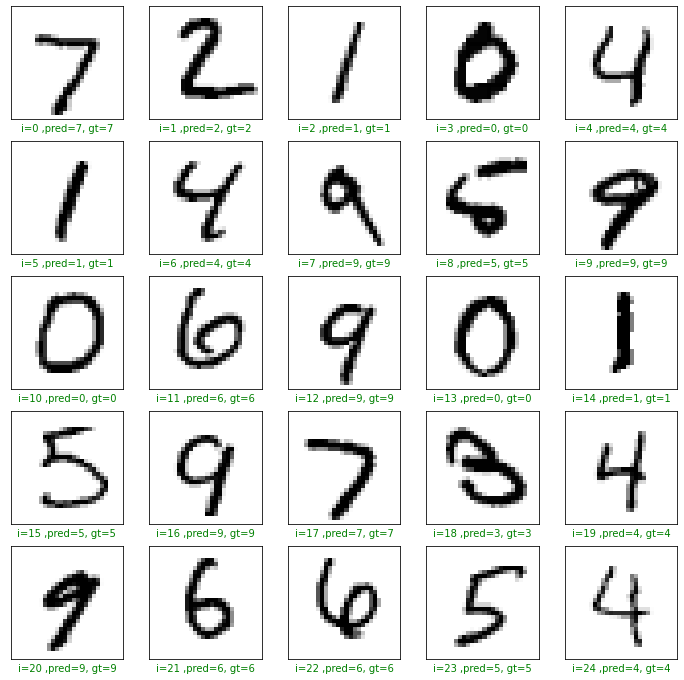

In [24]:
#plotting the result
plt.figure(figsize=(12,12))

start_index=0

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred=np.argmax(preds[start_index+i])
  gt=y_test[start_index+i]

  col='g'
  if pred!=gt:
    col='r'

  plt.xlabel('i={} ,pred={}, gt={}'.format(start_index+i, pred,gt), color=col)
  plt.imshow(x_test[start_index+i],cmap='binary')
plt.show()

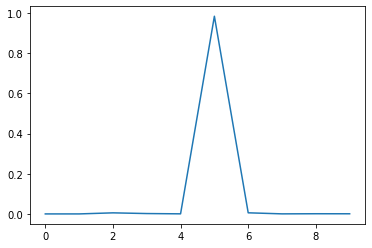

In [25]:
plt.plot(preds[8])
plt.show()